In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('market.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
data.shape

(1000, 17)

In [7]:
print(data.shape[0]) #number of rows
print(data.shape[1]) #number of cols

1000
17


In [8]:
data.size

17000

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
print(data['Payment'].value_counts())

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


In [11]:
products = data[['Gender', 'Product line']]
grouped_products = products.groupby(['Gender']).agg({'Product line':'count'})
grouped_products

,Product line
Gender,
Female,501
Male,499


### Gender count

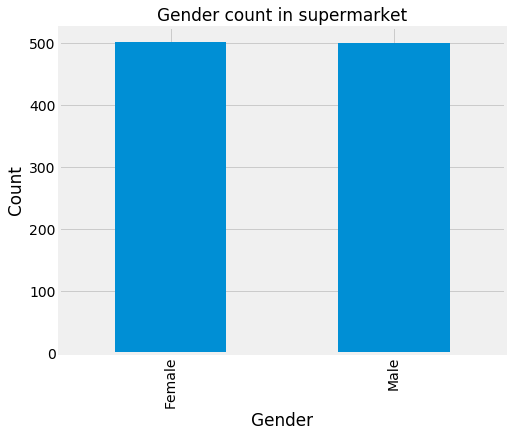

In [12]:
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
data['Gender'].value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender count in supermarket', fontsize=17)
plt.show()

In [13]:
import matplotlib
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

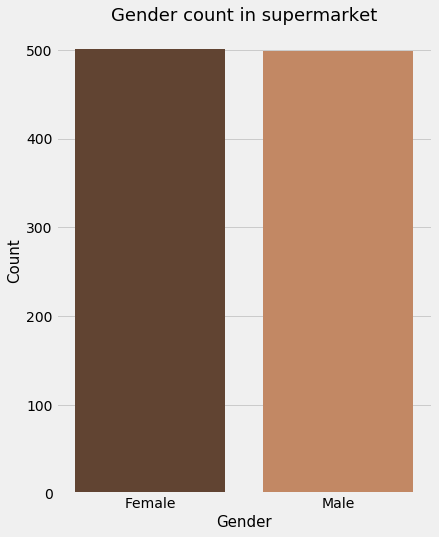

In [14]:
# option 2
plt.figure(figsize = (6, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Gender', data=data, palette = 'copper')
ax.set_xlabel('Gender', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Gender count in supermarket', fontsize = 18)
plt.show()

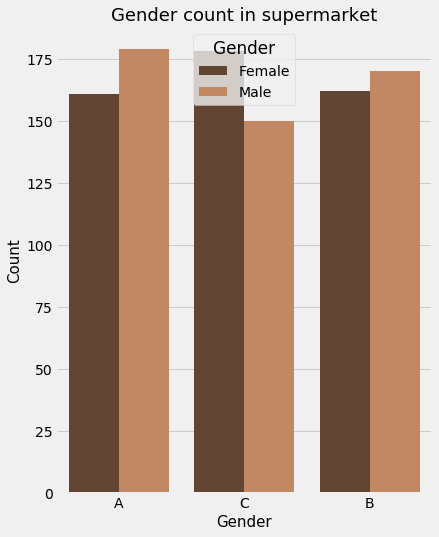

In [15]:
plt.figure(figsize = (6, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Branch', data=data,hue = 'Gender', palette = 'copper')
ax.set_xlabel('Gender', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Gender count in supermarket', fontsize = 18)
plt.show()

In [16]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [17]:
data.groupby('Gender').agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


### Customer Type

In [18]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

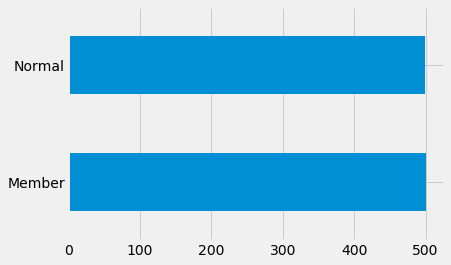

In [19]:
data['Customer type'].value_counts().plot(kind = 'barh')

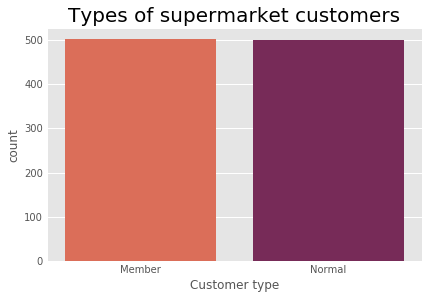

In [20]:
plt.style.use('ggplot')
ax = sns.countplot('Customer type', data = data, palette = 'rocket_r')
ax.set_title('Types of supermarket customers', fontsize = 20)
plt.show()

In [21]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

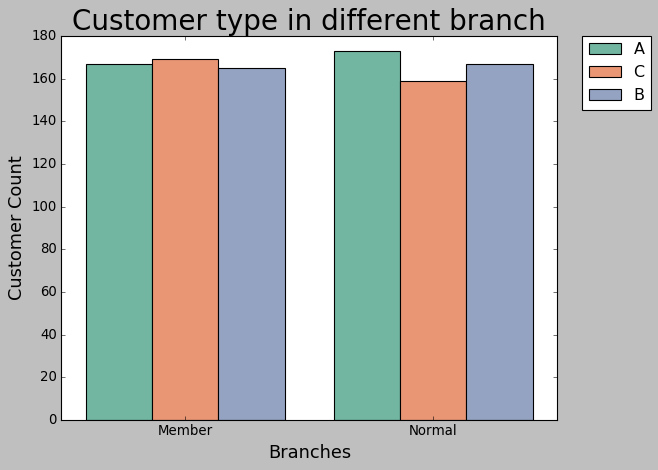

In [22]:
#member type per branch
plt.style.use('classic')
ax = sns.countplot('Customer type', hue = 'Branch', palette ='Set2' , data = data)
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Payment types

Text(0.5, 1.0, 'Payment methods by customers')

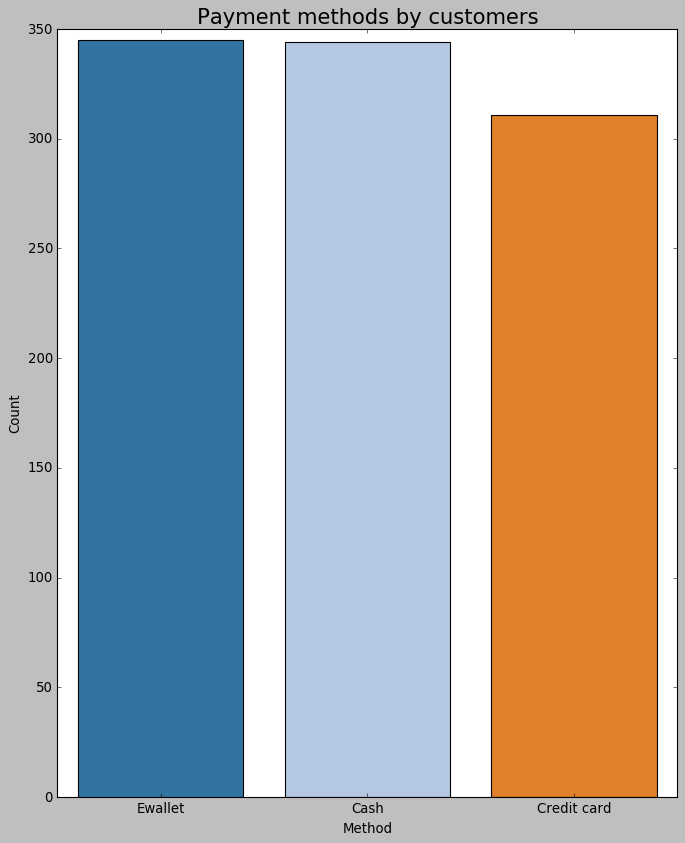

In [23]:
plt.figure(figsize=(10,12))
ax = sns.countplot('Payment', palette ='tab20', data = data)
ax.set_xlabel('Method')
ax.set_ylabel('Count')
ax.set_title('Payment methods by customers', fontsize = 19)

Text(0.5, 1.0, 'Payment methods by customers')

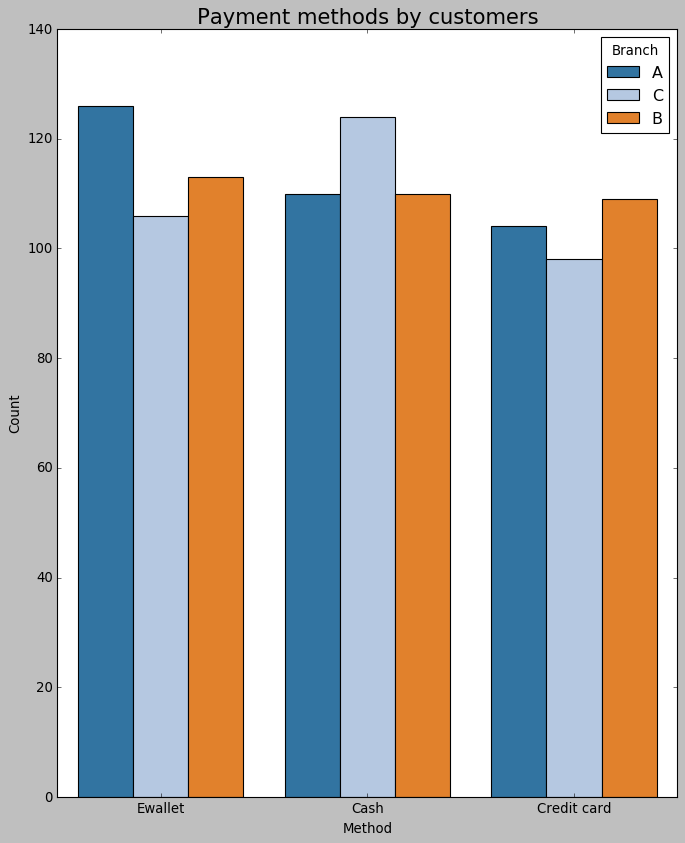

In [24]:
plt.figure(figsize=(10,12))
ax = sns.countplot('Payment', hue = 'Branch', palette ='tab20', data = data)
ax.set_xlabel('Method')
ax.set_ylabel('Count')
ax.set_title('Payment methods by customers', fontsize = 19)

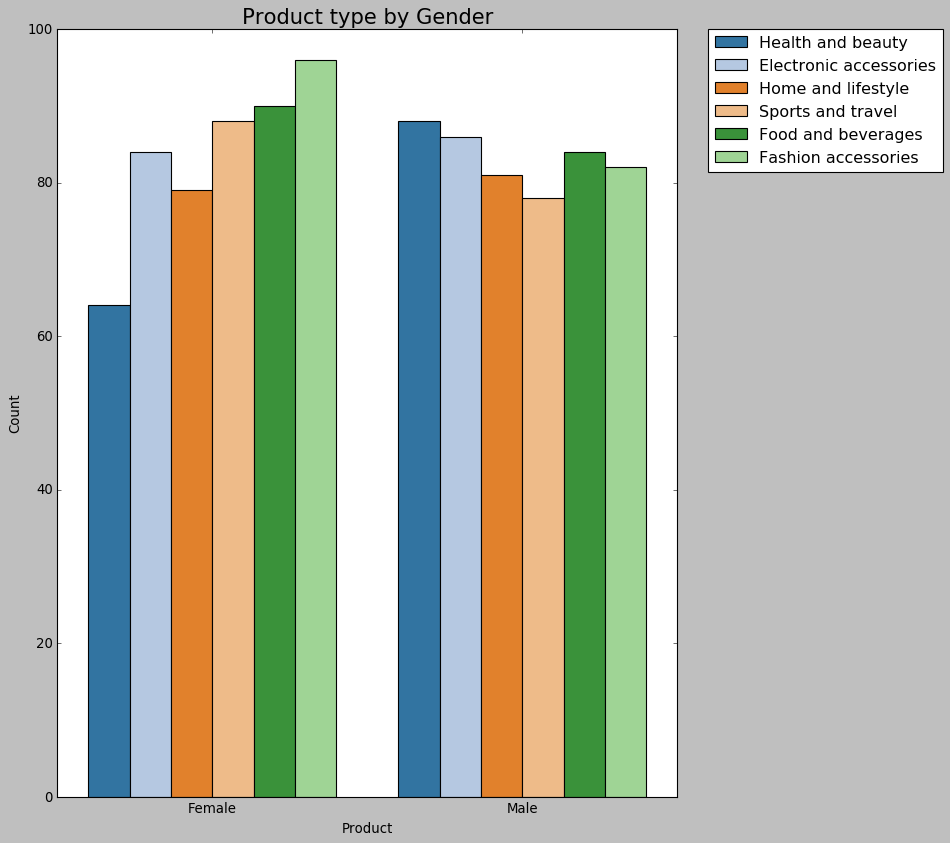

In [25]:
plt.figure(figsize=(10,12))
ax = sns.countplot('Gender', hue = 'Product line', palette ='tab20', data = data)
ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Product type by Gender', fontsize = 19)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Product type by Gender')

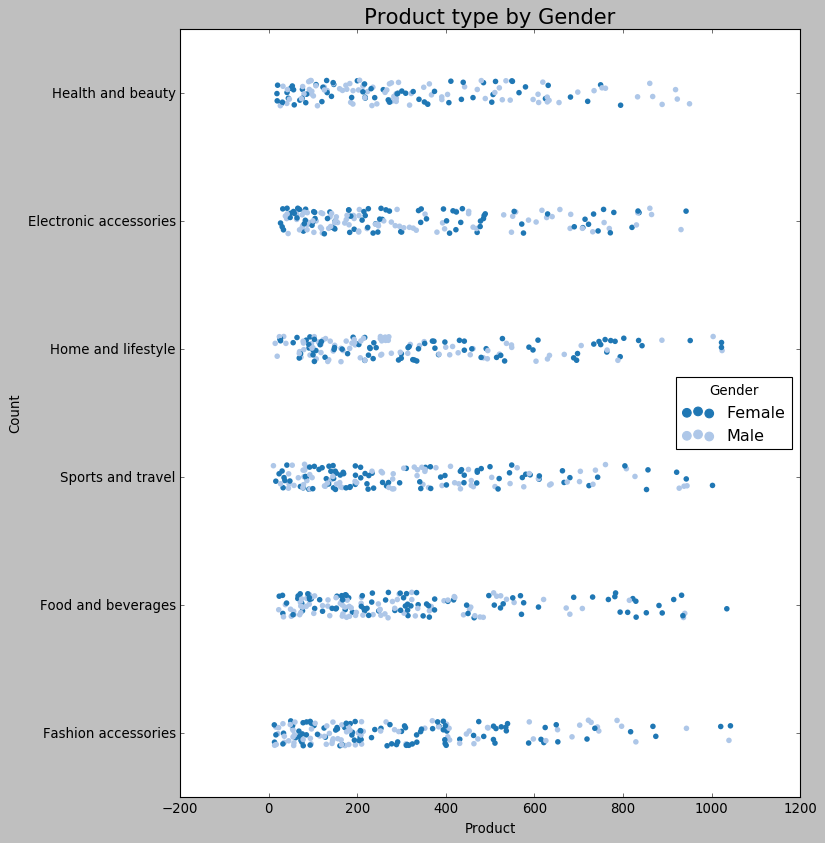

In [26]:
plt.figure(figsize=(10,12))
plt.style.use('classic')
ax = sns.stripplot(x = 'Total', y ='Product line', hue = 'Gender', palette ='tab20', data = data)
ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Product type by Gender', fontsize = 19)

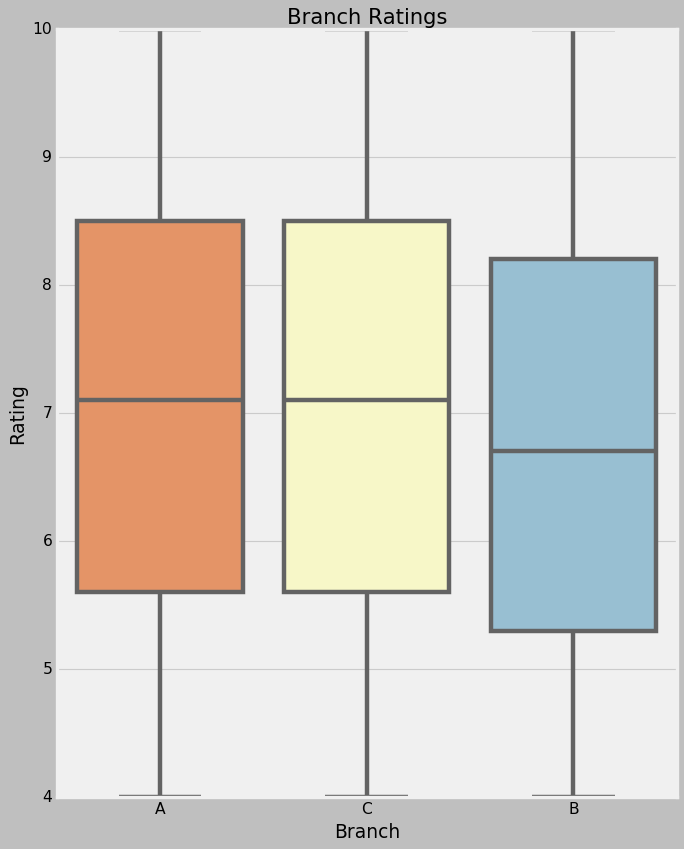

In [27]:
#ratings in branches
plt.figure(figsize=(10,12))
plt.style.use('fivethirtyeight')
ax = sns.boxplot(x = 'Branch', y = 'Rating', palette ='RdYlBu', data = data)
ax.set_xlabel('Branch')
ax.set_ylabel('Rating')
ax.set_title('Branch Ratings', fontsize = 19)
plt.show()

### Product vs Quantity

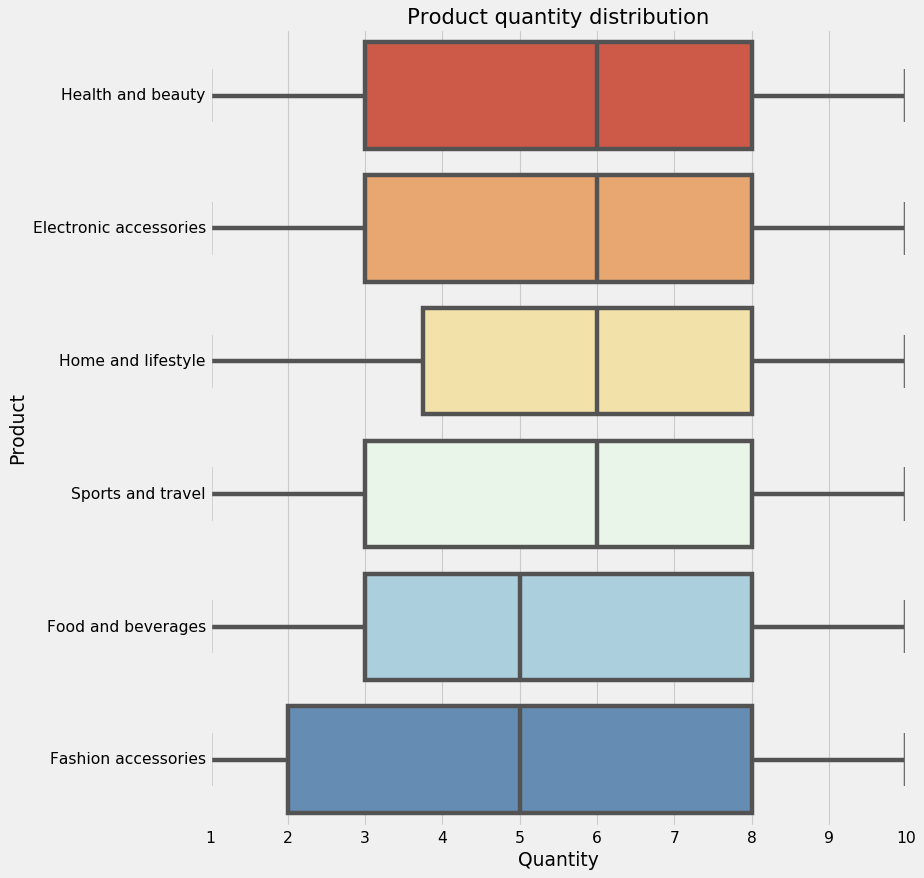

In [28]:
#ratings in branches
plt.figure(figsize=(10,12))
plt.style.use('fivethirtyeight')
ax = sns.boxplot(y = 'Product line', x = 'Quantity', palette ='RdYlBu', data = data)
ax.set_ylabel('Product')
ax.set_label('Quantity')
ax.set_title('Product quantity distribution', fontsize = 19)
plt.show()

### Max sales time

In [29]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


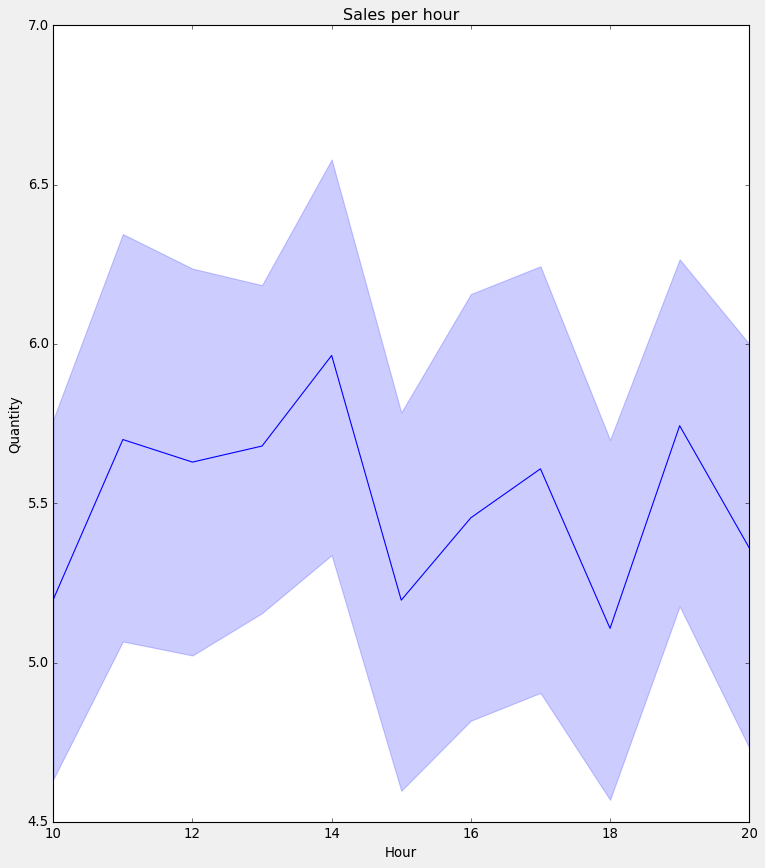

In [30]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
plt.figure(figsize = (10,12))
plt.style.use('classic')
sns.lineplot(x = 'Hour', y = 'Quantity', data = data).set_title('Sales per hour')
plt.show()

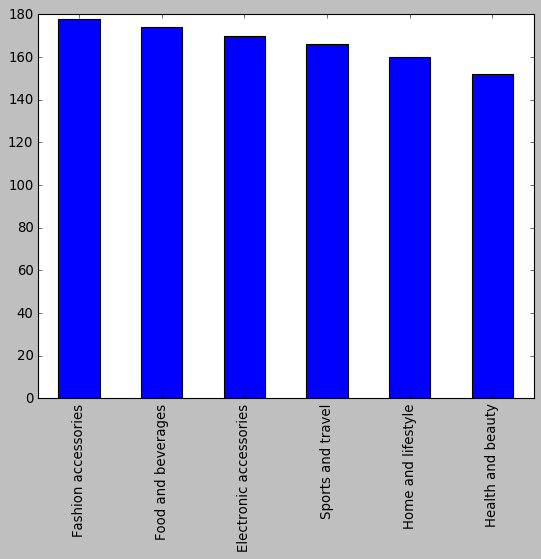

In [31]:
data['Product line'].value_counts().plot(kind = 'bar');